## Zomato Data Analysis Project Using Python


**Step1: Import necessary Python libraries**

pandas: data manipulation & analysis

numpy: numerical operations

matplotlib & seaborn: data visualization

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step2: Crete Dataframe**


In [14]:
dataframe = pd.read_csv("/content/Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**Let's remove denominator & convert the data type of column "rate" to float**


In [16]:
df = dataframe

In [17]:
# Convert 'rate' column to strings and removes the denominator /5 and keeps the part before it as a string
df['rate'] = df['rate'].astype(str).str.split('/').str[0]

# Convert to numeric
df['rate'] = pd.to_numeric(df['rate'])

print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

**Summary of Dataframe**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


***Conclusion: There is no null value***

**Q1:TYPE OF RESTAURANT**

Text(0.5, 1.0, 'Type of Restaurant')

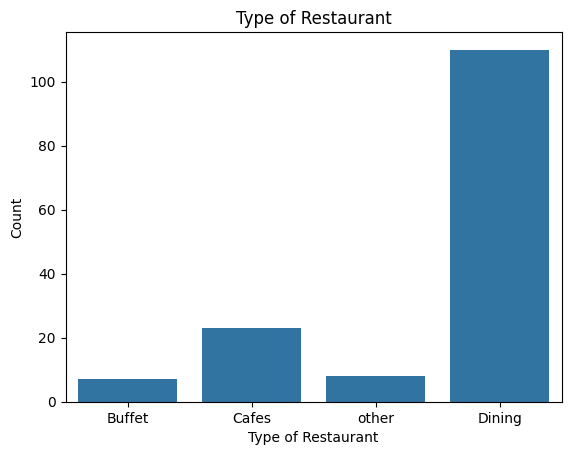

In [19]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.title("Type of Restaurant")

***Conclusion: Most of the restaurant fall under Dining category***

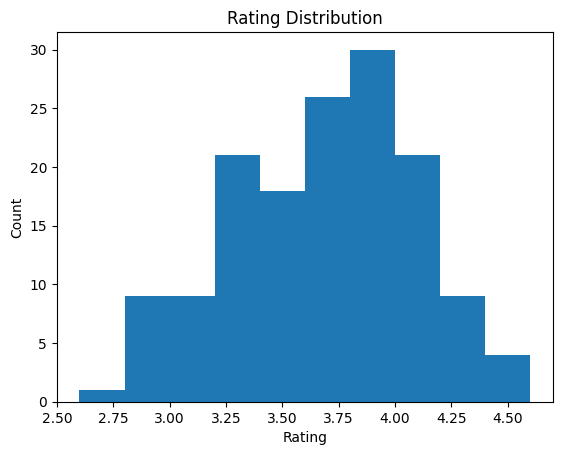

In [20]:
plt.hist(df['rate'])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()

**Q2: Votes for each type of restaurant**

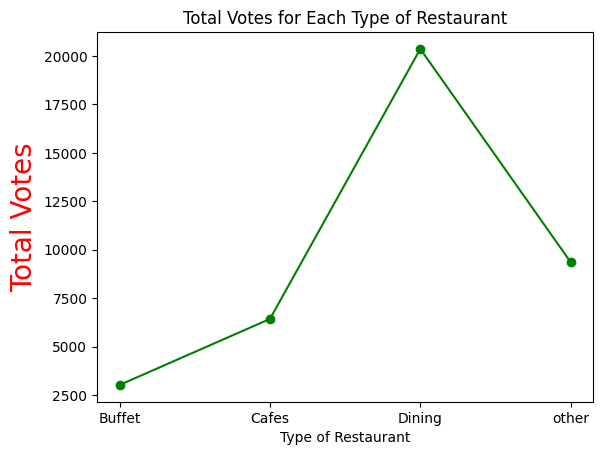

In [27]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().reset_index()
result = pd.DataFrame(grouped_data)  # Corrected the DataFrame creation
plt.plot(result['listed_in(type)'], result['votes'], c='green', marker='o')  # Specify x and y columns
plt.xlabel('Type of Restaurant')
plt.ylabel('Total Votes', c='red', size=20)
plt.title('Total Votes for Each Type of Restaurant')
plt.show()

***Dining receives maximum votes followed by other, then cafes and least votes for Buffet***

**Q3: Ratings of Restaurants**

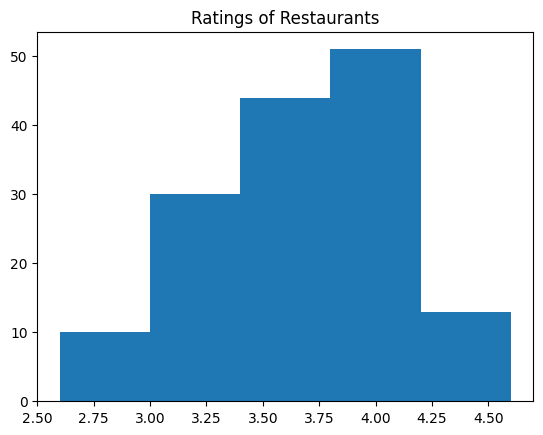

In [23]:
plt.hist(dataframe['rate'], bins=5)
plt.title('Ratings of Restaurants')
plt.show()

***Conclusion: Majority of restaurants had received ratings with range of 3.5 to 4***





**Q4: Average spending of couples on each order**

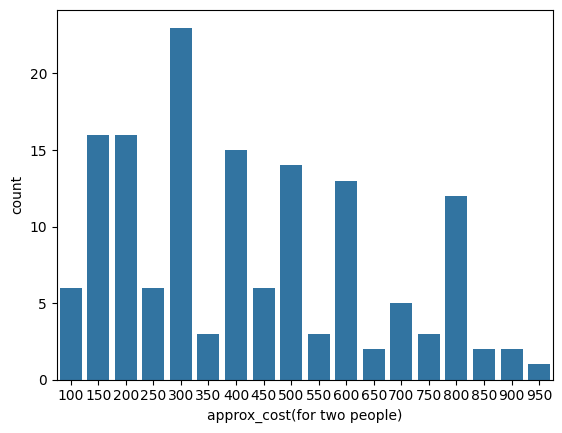

In [32]:
couple_data = dataframe['approx_cost(for two people)']  # Accessing column from the dataframe
sns.countplot(x=couple_data)
plt.show()


**Q5: Offline vs Online which receives max ratings**

<Axes: xlabel='online_order', ylabel='rate'>

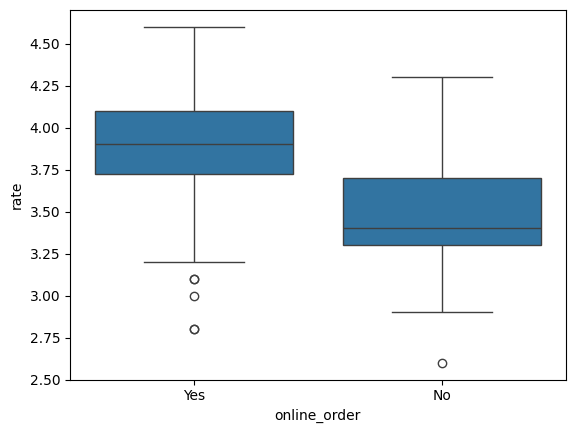

In [25]:
sns.boxplot(x='online_order', y='rate', data=dataframe)

***Conclusion: Offline orders recieved lower ratings in comparison to online orders***

**Q6: Which modes of Restraunts receive good orders**

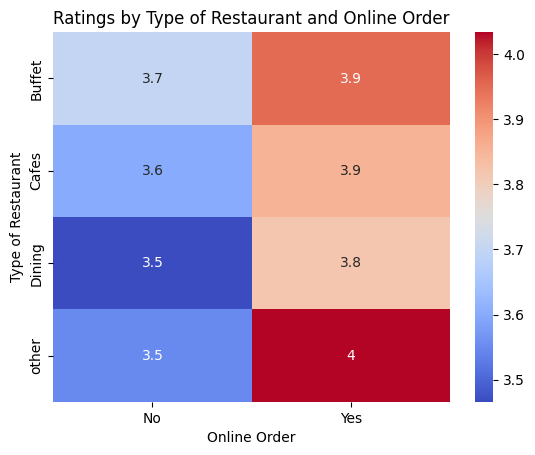

In [26]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', values='rate', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Ratings by Type of Restaurant and Online Order')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.show()

***Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receives online orders.
It suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.***